In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import load_model
from keras.utils import np_utils
from sklearn.metrics import confusion_matrix, f1_score

Using TensorFlow backend.


In [2]:
%matplotlib inline

In [31]:
def plot_confusion_matrix_return_fscore(m, x_test, e_y_test, m_y_test, output_name):
    model = load_model(m)
    evaluate = model.evaluate(x_test, e_y_test)
    print(evaluate)
    
    # one hot encoding to label
    y_pred = model.predict(x_test)
    y_pred = np.argmax(y_pred, axis=1)
    
    matrix = confusion_matrix(m_y_test, y_pred)
    # Plot Confusion Matrix
    plt.title('Confusion Matrix')
    plt.ylabel('y_test')
    plt.xlabel('y_predicted')
    plt.imshow(matrix, aspect='auto', cmap='viridis')
    plt.savefig(output_name)
    return f1_score(y_test, y_pred,  average='macro')

In [32]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the RGB values.
x_train /= 255
x_test /= 255

10000/10000 [==============================] - 6s 616us/step
[0.11972708850347254, 0.9848]
fscore_mnist_model_part1 = 0.9846220257065097


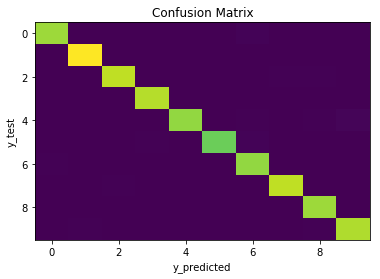

In [33]:
f_mnist_model_part1 = plot_confusion_matrix_return_fscore('models/mnist_model_part1.h5', x_test, np_utils.to_categorical(y_test), y_test, 'figures/part3/mnist_confusion_matrix_part1.png')
print('fscore_mnist_model_part1 =', f_mnist_model_part1)

10000/10000 [==============================] - 6s 589us/step
[0.04502862603109388, 0.9877]
fscore_mnist_model_part2 = 0.9875799397744413


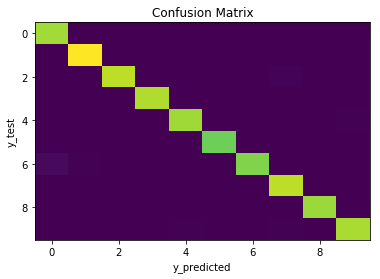

In [34]:
f_mnist_model_part2 = plot_confusion_matrix_return_fscore('models/mnist_model_part2.h5', x_test, y_test, y_test, 'figures/part3/mnist_confusion_matrix_part2.png')
print('fscore_mnist_model_part2 =', f_mnist_model_part2)

In [35]:
infile = open('line-data-input/X1.pickle','rb')
x_data = pickle.load(infile)
infile.close()

infile = open('line-data-input/Y1.pickle','rb')
y_data = pickle.load(infile)
infile.close()

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 3)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB values
x_train /= 255
x_test /= 255

19200/19200 [==============================] - 13s 690us/step
[0.023770663212217377, 0.9943229166666666]
fscore_line_model_part1 = 0.9943235483519494


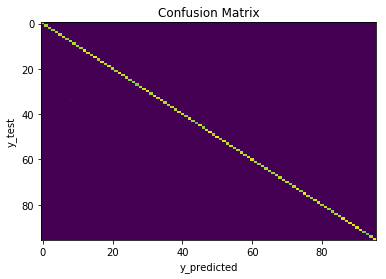

In [37]:
f_line_model_part1 = plot_confusion_matrix_return_fscore('models/line_model_part1.h5', x_test, np_utils.to_categorical(y_test), y_test, 'figures/part3/line_confusion_matrix_part1.png')
print('fscore_line_model_part1 =', f_line_model_part1)

19200/19200 [==============================] - 13s 674us/step
[0.026461395994507864, 0.99203125]
fscore_line_model_part2 = 0.9919654231060558


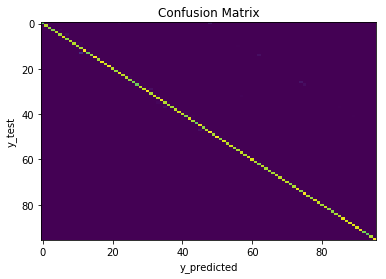

In [38]:
f_line_model_part2 = plot_confusion_matrix_return_fscore('models/line_model_part2.h5', x_test, y_test, y_test, 'figures/part3/line_confusion_matrix_part2.png')
print('fscore_line_model_part2 =', f_line_model_part2)